In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

sns.set()

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
from src.settings import PATH_TO_DUMPS, PATH_TO_BLOG_CATALOG

In [89]:
X = pd.read_csv(
    PATH_TO_DUMPS + '/models/deepwalk_BlogCatalog_d32_ws1.csv',
    #PATH_TO_DUMPS + '/models/hist_loss_BlogCatalog_d32.csv',
    delim_whitespace=True, header=None,
    skiprows=1,
    index_col=0
).sort_index()
X.index.name=None

In [4]:
y = pd.read_csv(
    PATH_TO_BLOG_CATALOG + '/data/group-edges.csv', 
    header=None, 
    delim_whitespace=True, 
    index_col=0
).sort_index()
y.index.name = None

yy = []
for i in range(1, 10313):
    values = y.loc[i].values
    if len(values) != 1:
        values = [item[0] for item in values]
    else:
        values = list(values)
    yy.append(values)
    
y_multilabel = MultiLabelBinarizer().fit_transform(yy)

In [90]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,-0.538722,-0.985906,0.395292,1.752981,-0.928212,0.241434,-1.680373,0.065574,-0.514501,0.093616,...,-0.002070,0.464417,-0.494720,-0.979391,-1.300482,-0.454577,-0.415256,-0.246755,-2.066889,-0.819533
2,0.258177,0.420359,-0.293750,0.314135,-0.295904,0.924739,-0.420338,0.422281,-0.736682,-1.326544,...,0.523910,-0.126052,0.324381,0.137676,-0.341231,-0.270099,0.191064,0.147401,-0.272364,-0.443318
3,0.730662,0.445611,0.400245,0.512928,-0.079770,-1.373232,-1.082946,-0.568570,-1.001116,-1.622457,...,1.284798,-0.518983,-0.549063,-0.668436,-1.417183,0.282246,0.625916,1.080132,-1.128400,-1.289345
4,-0.018591,0.911064,0.850709,0.357437,0.597082,0.949400,-0.319233,0.240510,-0.314289,-0.393608,...,-0.205885,-0.259920,0.088952,-0.149646,0.335661,0.128203,-0.566604,0.062009,-1.142383,0.154245
5,-0.342035,0.108253,0.369818,0.512425,-0.713907,-1.085678,-0.863964,-0.709512,-1.013759,-1.035405,...,-0.259602,-0.954720,-1.322720,-0.135571,-0.507903,-2.279927,0.614777,-0.705773,-2.413957,-0.097195


In [91]:
E = X.values

In [92]:
E_norm = E / np.linalg.norm(E, axis=1).reshape((E.shape[0], 1))

In [93]:
E_corr = np.dot(E_norm, E_norm.T)

In [94]:
E_corr

array([[ 1.        ,  0.33791846,  0.38274609, ...,  0.10841219,
         0.11803519,  0.31202632],
       [ 0.33791846,  1.        ,  0.52484713, ...,  0.28191129,
         0.3181977 ,  0.36315035],
       [ 0.38274609,  0.52484713,  1.        , ...,  0.15200751,
         0.14904216,  0.18932824],
       ..., 
       [ 0.10841219,  0.28191129,  0.15200751, ...,  1.        ,
         0.52773446,  0.45452125],
       [ 0.11803519,  0.3181977 ,  0.14904216, ...,  0.52773446,
         1.        ,  0.75332632],
       [ 0.31202632,  0.36315035,  0.18932824, ...,  0.45452125,
         0.75332632,  1.        ]])

In [174]:
graph = nx.read_edgelist(
        '{}/data/edges.csv'.format(PATH_TO_BLOG_CATALOG), nodetype=int
)
nodes = graph.nodes()
adjacency_matrix = nx.adjacency_matrix(graph, nodes).astype('float64')
N = adjacency_matrix.shape[0]
A = adjacency_matrix.toarray()

In [175]:
A

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [95]:
pos_mask = A

neg_mask = 1 - pos_mask - np.eye(pos_mask.shape[0])
pos_samples = E_corr[pos_mask.nonzero()]
neg_samples = E_corr[neg_mask.nonzero()]

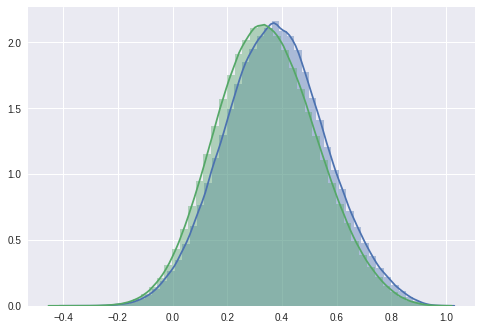

In [96]:
sns.distplot(pos_samples)
sns.distplot(np.random.choice(neg_samples, size=pos_samples.shape[0]*10))
plt.show()

In [5]:
y_multilabel[5]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
B = A.copy()
for i in range(N):
    print(i, end=' ')
    for j in range(i + 1, N):
        if A[i][j] == 1:
            for k in range(j + 1, N):
                if A[i][k] == 1:
                    B[j][k] = B[k][j] = 1

0 1 2 

KeyboardInterrupt: 

In [197]:
from itertools import combinations
B = A.copy()
for i in range(N):
    if i % 100 == 0:
        print(i, end=' ')
    nonzero_indxs = np.nonzero(A[i][i+1:])[0] + (i+1)
    indxs_pairs = combinations(nonzero_indxs, 2)
    for k1, k2 in indxs_pairs:
        B[k1][k2] = B[k2][k1] = 1

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 

In [177]:
A[1][:100]

array([ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.])

In [182]:
A[:10,:10]

array([[ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.]])

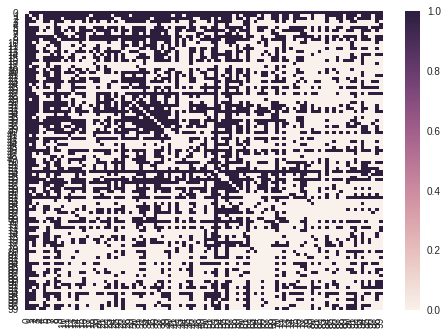

In [192]:
sns.heatmap(A[:100, :100])
plt.show()

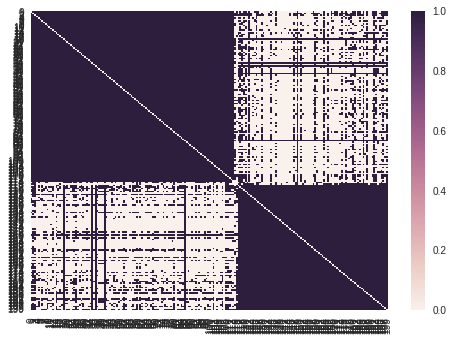

In [220]:
x = 6900
sns.heatmap(B[x:x + 200, x:x + 200])
plt.show()

In [213]:
len(np.nonzero(A)[0])

667966

In [154]:
list(indxs_pairs)

[]

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from src.classifiers import MultilabelOVRClassifier

from sklearn.model_selection import cross_val_score, ShuffleSplit

In [16]:
clf1 = LogisticRegression(C=100)

In [17]:
clf2 = OneVsRestClassifier(LogisticRegression(C=1, verbose=0), n_jobs=-1)

In [97]:
MultilabelOVRClassifier.set_labels(X.index.values, y_multilabel)

clf3 = MultilabelOVRClassifier(LogisticRegression(C=1, verbose=0), n_jobs=-1)

In [98]:
clf = clf3

In [20]:
clf.fit(X, y_multilabel)

MultilabelOVRClassifier(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
            n_jobs=-1)

In [21]:
pred = clf.predict(X)

In [22]:
pred[5]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [35]:
len(X)

10312

In [35]:
len([_ for arr in clf.predict(X) if sum(arr)>1])

2852

In [21]:
[sorted(item) for item in clf.predict_proba(X.loc[5:6])]

[[0.0010532040435299163,
  0.0011268825812917312,
  0.0035125258886279666,
  0.0050284841997343347,
  0.006514888965241392,
  0.0066707885628602935,
  0.0072434634895832189,
  0.0072565494285342733,
  0.0074904767396766578,
  0.0087195480813021236,
  0.0094694030538000854,
  0.010226018146236804,
  0.011337871685606696,
  0.013724155110305688,
  0.018311349616258271,
  0.019021692373050104,
  0.025379693204039436,
  0.025557484885893069,
  0.028888395956289226,
  0.030805101324858045,
  0.03176689913635343,
  0.034031864653419654,
  0.035092829994719452,
  0.036562045120967779,
  0.037292355583360651,
  0.037526124145252825,
  0.038269925767749687,
  0.038838733600043904,
  0.042904318055535157,
  0.044647362717864215,
  0.057557978648124397,
  0.064653024028810152,
  0.071543958256682263,
  0.072904018616525873,
  0.073564067027194299,
  0.078143853413522729,
  0.080322084559232648,
  0.11226915665842738,
  0.18965656458778951],
 [0.00090249601470001012,
  0.0010631068363405631,
  0.0

In [24]:
ss = ShuffleSplit(n_splits=3, random_state=42, train_size=0.6)

In [99]:
scores = cross_val_score(clf, X, y_multilabel, cv=ss.split(X), scoring='f1_micro', verbose=1)
print(scores)
print(scores.mean())

[ 0.33522325  0.35306263  0.34598854]
0.344758137883


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


In [19]:
scores = cross_val_score(clf, X, y_multilabel, cv=3, scoring='f1_macro', verbose=1)
print(scores)
print(scores.mean())

/home/tsepa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tsepa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.03221955  0.03094239  0.0263378 ]
0.0298332460312


/home/tsepa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s finished


In [23]:
y = pd.read_csv(
    '../data/BlogCatalog-dataset/data/group-edges.csv', 
    header=None, 
    delim_whitespace=True, 
    index_col=0
).sort_index()
y.index.name = None

yy = []
for i in range(1, 10313):
    values = y.loc[i].values
    if len(values) != 1:
        values = [item[0] for item in values]
    else:
        values = list(values)
    yy.append(values)
    
y_multilabel = MultiLabelBinarizer().fit_transform(yy)

names = [
    'deepwalk_BlogCatalog_d32',
    'deepwalk_BlogCatalog_d64',
    'deepwalk_BlogCatalog_d128',
    'n2v_BlogCatalog_p1_q1_d32',
    'n2v_BlogCatalog_p1_q1_d64',
    'n2v_BlogCatalog_p1_q1_d128',
]
results = {}
for name in names:
    results[name] = {}
    X = pd.read_csv(
        '../dumps/models/{}.csv'.format(name),
        delim_whitespace=Tru'n2v_BlogCatalog_p1_q1_d64',e, header=None,
        skiprows=1,
        index_col=0
    ).sort_index()
    X.index.name=None
    print(name)
    ss = ShuffleSplit(n_splits=10, random_state=42, train_size=0.1)
    scores = cross_val_score(clf, X, y_multilabel, cv=ss.split(X), scoring='f1_micro', verbose=1)
    print(scores)
    print(scores.mean())
    results[name]['f1_micro'] = scores.mean()

print(results)

deepwalk_BlogCatalog_d32


/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 37 is present i

[ 0.31750532  0.3083276   0.33667622  0.33032616  0.28840782  0.32535211
  0.33039946  0.29781421  0.31302521  0.32052162]
0.316835572337
deepwalk_BlogCatalog_d64


/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 37 is present i

[ 0.31041814  0.32346869  0.32234957  0.31644691  0.29120112  0.31830986
  0.33310765  0.30532787  0.30742297  0.32120796]
0.314926073743
deepwalk_BlogCatalog_d128


/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 37 is present i

[ 0.32034018  0.32759807  0.33094556  0.31783484  0.30097765  0.32042254
  0.33310765  0.31967213  0.30322129  0.32532601]
0.319944592438
n2v_BlogCatalog_p1_q1_d32


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.3s finished
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-pac

[ 0.33522325  0.35443909  0.35959885  0.3407356   0.31843575  0.34507042
  0.3337847   0.32991803  0.34593838  0.32463967]
0.338778374574
n2v_BlogCatalog_p1_q1_d64


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.4s finished
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-pac

[ 0.35861091  0.35650379  0.36676218  0.34212353  0.32541899  0.3443662
  0.34123223  0.32035519  0.34103641  0.35552505]
0.345193447888
n2v_BlogCatalog_p1_q1_d128


/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 38 is present in all training examples.
  str(classes[c]))
/home/student_panov/MrTsepa/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 37 is present i

[ 0.33876683  0.34618032  0.36389685  0.34559334  0.32122905  0.3443662
  0.34800271  0.33333333  0.34453782  0.34934798]
0.343525441412
{'deepwalk_BlogCatalog_d32': {'f1_micro': 0.31683557233719906}, 'deepwalk_BlogCatalog_d64': {'f1_micro': 0.31492607374280857}, 'deepwalk_BlogCatalog_d128': {'f1_micro': 0.31994459243798984}, 'n2v_BlogCatalog_p1_q1_d32': {'f1_micro': 0.33877837457371374}, 'n2v_BlogCatalog_p1_q1_d64': {'f1_micro': 0.34519344788800799}, 'n2v_BlogCatalog_p1_q1_d128': {'f1_micro': 0.34352544141234664}}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.7s finished


In [25]:
y = pd.read_csv(
    '../data/BlogCatalog-dataset/data/group-edges.csv', 
    header=None, 
    delim_whitespace=True, 
    index_col=0
).sort_index()
y.index.name = None

yy = []
for i in range(1, 10313):
    values = y.loc[i].values
    if len(values) != 1:
        values = [item[0] for item in values]
    else:
        values = list(values)
    yy.append(values)
    
y_multilabel = MultiLabelBinarizer().fit_transform(yy)

names = [
    'deepwalk_BlogCatalog_d32',
    'deepwalk_BlogCatalog_d64',
    'deepwalk_BlogCatalog_d128',
    'n2v_BlogCatalog_p1_q1_d32',
    'n2v_BlogCatalog_p1_q1_d64',
    'n2v_BlogCatalog_p1_q1_d128',
]
results = {}
for name in names:
    results[name] = {}
    X = pd.read_csv(
        '../dumps/models/{}.csv'.format(name),
        delim_whitespace=True, header=None,
        skiprows=1,
        index_col=0
    ).sort_index()
    X.index.name=None
    print(name)
    ss = ShuffleSplit(n_splits=10, random_state=42, train_size=0.6)
    scores = cross_val_score(clf, X, y_multilabel, cv=ss.split(X), scoring='f1_micro', verbose=1)
    print(scores)
    print(scores.mean())
    results[name]['f1_micro'] = scores.mean()

print(results)

deepwalk_BlogCatalog_d32


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.9s finished


[ 0.35223246  0.33241569  0.35959885  0.34489938  0.32472067  0.34507042
  0.34326337  0.32513661  0.33753501  0.34797529]
0.341284776257
deepwalk_BlogCatalog_d64


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.2s finished


[ 0.35861091  0.35856848  0.3717765   0.35600278  0.3372905   0.3528169
  0.3676371   0.33811475  0.3557423   0.35895676]
0.355551699132
deepwalk_BlogCatalog_d128
[ 0.37207654  0.37302134  0.38467049  0.36502429  0.34986034  0.36338028
  0.38659445  0.3442623   0.36344538  0.36376115]
0.36660965438
n2v_BlogCatalog_p1_q1_d32


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.7s finished


[ 0.36853296  0.36820372  0.37679083  0.35669674  0.33868715  0.37323944
  0.36018957  0.34699454  0.36834734  0.35415237]
0.361183464437
n2v_BlogCatalog_p1_q1_d64


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.7s finished


[ 0.3869596   0.37990365  0.37893983  0.36918806  0.3547486   0.37816901
  0.3859174   0.34221311  0.37254902  0.3726836 ]
0.372127189103
n2v_BlogCatalog_p1_q1_d128
[ 0.37491141  0.37783895  0.39469914  0.37612769  0.37290503  0.37746479
  0.38185511  0.36680328  0.37044818  0.37131091]
0.376436449291
{'deepwalk_BlogCatalog_d32': {'f1_micro': 0.34128477625714709}, 'deepwalk_BlogCatalog_d64': {'f1_micro': 0.3555516991322108}, 'deepwalk_BlogCatalog_d128': {'f1_micro': 0.36660965438019455}, 'n2v_BlogCatalog_p1_q1_d32': {'f1_micro': 0.36118346443725552}, 'n2v_BlogCatalog_p1_q1_d64': {'f1_micro': 0.37212718910335757}, 'n2v_BlogCatalog_p1_q1_d128': {'f1_micro': 0.3764364492914824}}


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   14.0s finished


In [5]:
y = pd.read_csv(
    '../data/BlogCatalog-dataset/data/group-edges.csv', 
    header=None, 
    delim_whitespace=True, 
    index_col=0
).sort_index()
y.index.name = None

yy = []
for i in range(1, 10313):
    values = y.loc[i].values
    if len(values) != 1:
        values = [item[0] for item in values]
    else:
        values = list(values)
    yy.append(values)
    
y_multilabel = MultiLabelBinarizer().fit_transform(yy)

names = [
    'hist_loss_BlogCatalog_d32'
]
results = {}
for name in names:
    results[name] = {}
    X = pd.read_csv(
        '../dumps/models/{}.csv'.format(name),
        delim_whitespace=True, header=None,
        skiprows=1,
        index_col=0
    ).sort_index()
    X.index.name=None
    print(name)
    ss = ShuffleSplit(n_splits=10, random_state=42, train_size=0.6)
    scores = cross_val_score(clf, X, y_multilabel, cv=ss.split(X), scoring='f1_micro', verbose=1)
    print(scores)
    print(scores.mean())
    results[name]['f1_micro'] = scores.mean()

print(results)

hist_loss_BlogCatalog_d32


NameError: name 'clf' is not defined

In [27]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'deepwalk_BlogCatalog_d128': {'f1_micro': 0.36660965438019455},
    'deepwalk_BlogCatalog_d32': {'f1_micro': 0.34128477625714709},
    'deepwalk_BlogCatalog_d64': {'f1_micro': 0.3555516991322108},
    'n2v_BlogCatalog_p1_q1_d128': {'f1_micro': 0.3764364492914824},
    'n2v_BlogCatalog_p1_q1_d32': {'f1_micro': 0.36118346443725552},
    'n2v_BlogCatalog_p1_q1_d64': {'f1_micro': 0.37212718910335757}}
